<a href="https://colab.research.google.com/github/LindsClar/Capstone-3/blob/main/Data_Wrangling_2_Coffee_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Coffee Sales

Coffee is my favorite drug, and as a mom, it's the drug I drink daily. I especially love my coffee when someone else makes it. Through these Coffee sales I will be cleaning and organizing the data to assist my favorite businesses.

Data: https://www.kaggle.com/code/ahmedabbas757/coffee-shop-sales/input

Table of contents
  - Import libraries
  - Import Data
  - Analyze data
  - Shaping the Data
    - Renaming and removing unneccessary data




In [ ]:
#import all my libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import plotly.express as px
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose

import plotly.express as px
import plotly.graph_objects as go
import itertools

from dash import Dash, dcc, html, Input, Output

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

import warnings
warnings.filterwarnings('ignore')

Reading in the Data

In [ ]:
#importing data
df = pd.read_excel('/content/Coffee Shop Sales.xlsx')

Analyzing the DF.

In [ ]:
df.head(20)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


Now that the Data a loaded, it's time to analyze the data to determine how we'll approach it. I see above that there a lot of columns that aren't necceary so I will be dropping them down below. This will streamline the data necceary.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [ ]:
df.shape

(149116, 11)

In [ ]:
df.isnull()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149111,False,False,False,False,False,False,False,False,False,False,False
149112,False,False,False,False,False,False,False,False,False,False,False
149113,False,False,False,False,False,False,False,False,False,False,False
149114,False,False,False,False,False,False,False,False,False,False,False


# Transforming the Data
Looking through the data, there are a few changes I plan to make to better organize how the DataFrame is presented.

Based on how the data is currently structured, I’ve decided to take a different approach instead of melting or pivoting the data. I will narrow down the data first and then expand the columns that track the time periods and restaurants.

I’ll start by creating a column to track the time periods. Then, I will expand the store information to include separate columns for each restaurant. The goal is to clean the data thoroughly and reshape it so that it aligns with key metrics like the time of day (period), day of the week, and specific dates, making it easier to analyze.

In [ ]:
df.rename(columns={'unit_price': 'Price','transaction_qty': 'Qty','transaction_date': 'Date', 'transaction_time': 'Time', 'store_location': 'Store','product_category': 'Product'}, inplace=True)

In [ ]:
df.head()

,transaction_id,Date,Time,Qty,store_id,Store,product_id,Price,Product,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
#Product category and Product type are extremely similar
df = df.drop(columns=['product_type', 'transaction_id','store_id', 'product_id', 'product_detail'])
df.head(20)

,Date,Time,Qty,Store,Price,Product
0,2023-01-01,07:06:11,2,Lower Manhattan,3.00,Coffee
1,2023-01-01,07:08:56,2,Lower Manhattan,3.10,Tea
2,2023-01-01,07:14:04,2,Lower Manhattan,4.50,Drinking Chocolate
3,2023-01-01,07:20:24,1,Lower Manhattan,2.00,Coffee
4,2023-01-01,07:22:41,2,Lower Manhattan,3.10,Tea
5,2023-01-01,07:22:41,1,Lower Manhattan,3.00,Bakery
6,2023-01-01,07:25:49,1,Lower Manhattan,2.00,Coffee
7,2023-01-01,07:33:34,2,Lower Manhattan,2.00,Coffee
8,2023-01-01,07:39:13,1,Lower Manhattan,4.25,Coffee
9,2023-01-01,07:39:34,2,Lower Manhattan,3.50,Drinking Chocolate


 I don't like how the table has a lot more NaN, also should I use .melt? I was thinking of seperating

Note: the product category to create three or 4 smaller df by category
  Product Category
    - Coffee
    - Tea
    - Drinking coffee
    - Bakery

  While going throught the code, I went back and decided to classify by resturant and not focusing on coffee. I would like to see the sales of each Item and analyse what sells the most throughout the day

In [ ]:
#coffee_df = df[df['Product'].str.contains('coffee', case=False)]
#coffee_df.head(200)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     149116 non-null  datetime64[ns]
 1   Time     149116 non-null  object        
 2   Qty      149116 non-null  int64         
 3   Store    149116 non-null  object        
 4   Price    149116 non-null  float64       
 5   Product  149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 6.8+ MB


In [ ]:
#checking shape of DF
df.shape

(149116, 6)

Examing Unique values and missing values to drop

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


In [ ]:
#new column to create a distinct period of time morning, day, night
df['Period'] = pd.cut(
    pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],  # Corrected labels
    right=False  # Use right=False to ensure that 24:00 falls into the last bin
)

In [ ]:
#inspect
df.head(5)

,Date,Time,Qty,Store,Price,Product,Period
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Morning
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Morning
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Morning
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Morning
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Morning


In [ ]:
#ensuring format of time in the df
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df.head(5)

,Date,Time,Qty,Store,Price,Product,Period
0,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Morning
1,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Morning
2,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Morning
3,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Morning
4,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Morning


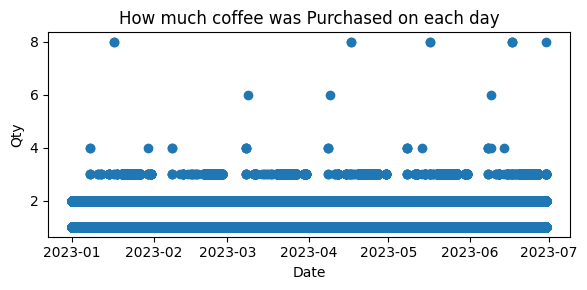

In [ ]:
#now I can plot the date to product purchase
plt.figure(figsize=(6,3))
plt.scatter(df['Date'], df['Qty'])
plt.xlabel('Date')
plt.ylabel('Qty')
plt.title('How much coffee was Purchased on each day')
plt.tight_layout()
plt.show()

In [ ]:
fig = px.line(df, x='Date', y='Qty', title='How much Product is normally was Purchased Over 7 Months')
fig.show()

With the plotting above I can see how purchase across the time line of 7 months is. We can also see how many coffee's customers purchase. I believe that there is different overlay between each resturant so I will be eliminating two of the three resturants so that we can inspect the variable of the items in one resturants.

In [ ]:
df = df[df['Store']=="Astoria"]

In [ ]:
df.head()
df.shape

(50599, 7)

In [ ]:
#the new column day_type
df['day_type'] = df['Date'].dt.day_name()

In [ ]:
#filling the column with the type of week ie. weekend and weekday
df['day_type'] = df['Date'].dt.weekday.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [ ]:
#inspecting
df.head(5)

,Date,Time,Qty,Store,Price,Product,Period,day_type
105,2023-01-01,11:01:48,1,Astoria,2.00,Coffee,Morning,Weekend
106,2023-01-01,11:01:58,1,Astoria,3.75,Coffee,Morning,Weekend
107,2023-01-01,11:01:58,1,Astoria,3.50,Bakery,Morning,Weekend
111,2023-01-01,11:08:11,1,Astoria,4.50,Drinking Chocolate,Morning,Weekend
113,2023-01-01,11:09:01,1,Astoria,4.50,Drinking Chocolate,Morning,Weekend


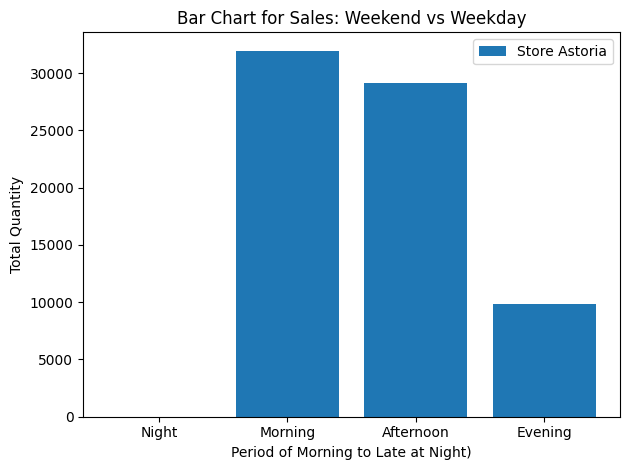

In [ ]:
fig, ax = plt.subplots()

#"Period" * "Store" = "Qty"
grouped = df.groupby(["Period", "Store"])["Qty"].sum().reset_index()

#creating bar chart
for store in grouped["Store"].unique():
    store_data = grouped[grouped["Store"] == store]
    ax.bar(store_data["Period"], store_data["Qty"], label=f"Store {store}")

#labelling
ax.set_xlabel("Period of Morning to Late at Night)")
ax.set_ylabel("Total Quantity")
ax.set_title("Bar Chart for Sales: Weekend vs Weekday")
ax.legend()

#plot
plt.tight_layout()
plt.show()

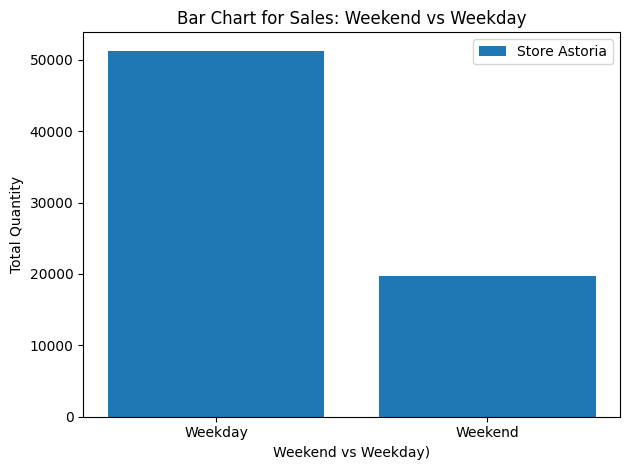

In [ ]:
fig, ax = plt.subplots()

# Grouping by "Period" and "Store" to calculate total quantity
grouped = df.groupby(["day_type", "Store"])["Qty"].sum().reset_index()

# Creating the bar chart
for store in grouped["Store"].unique():
    store_data = grouped[grouped["Store"] == store]
    ax.bar(store_data["day_type"], store_data["Qty"], label=f"Store {store}")

# Labelling
ax.set_xlabel("Weekend vs Weekday)")
ax.set_ylabel("Total Quantity")
ax.set_title("Bar Chart for Sales: Weekend vs Weekday")
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

With the bar chart above we can see the difference in sales in Astoria on the weekdays vs the weekends

In [ ]:
#seperating the columns for store
columns = pd.get_dummies(df['Store'], prefix='')

In [ ]:
df = pd.concat([df, columns], axis=1)

In [ ]:
fig = px.scatter(df, x='Date', y='Period', color='Product', hover_data={'Date': '|%B %d, %Y'}, title='Products in Astoria'
)

fig.update_xaxes(dtick="M1", tickformat="%b\n%Y")

fig.show()


In [ ]:
df.head(5)

,Date,Time,Qty,Store,Price,Product,Period,day_type,_Astoria
105,2023-01-01,11:01:48,1,Astoria,2.00,Coffee,Morning,Weekend,True
106,2023-01-01,11:01:58,1,Astoria,3.75,Coffee,Morning,Weekend,True
107,2023-01-01,11:01:58,1,Astoria,3.50,Bakery,Morning,Weekend,True
111,2023-01-01,11:08:11,1,Astoria,4.50,Drinking Chocolate,Morning,Weekend,True
113,2023-01-01,11:09:01,1,Astoria,4.50,Drinking Chocolate,Morning,Weekend,True


While looking through all my Data, I realized that I truly need to analyze each location for the sales. I see through this Data that I need to analyze each location to truly understand the sales per location.

In [ ]:
df['datetime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'].astype(str))

In [ ]:
specific_date = '2023-01-01'
plot_data = df[df['Date'] == specific_date]

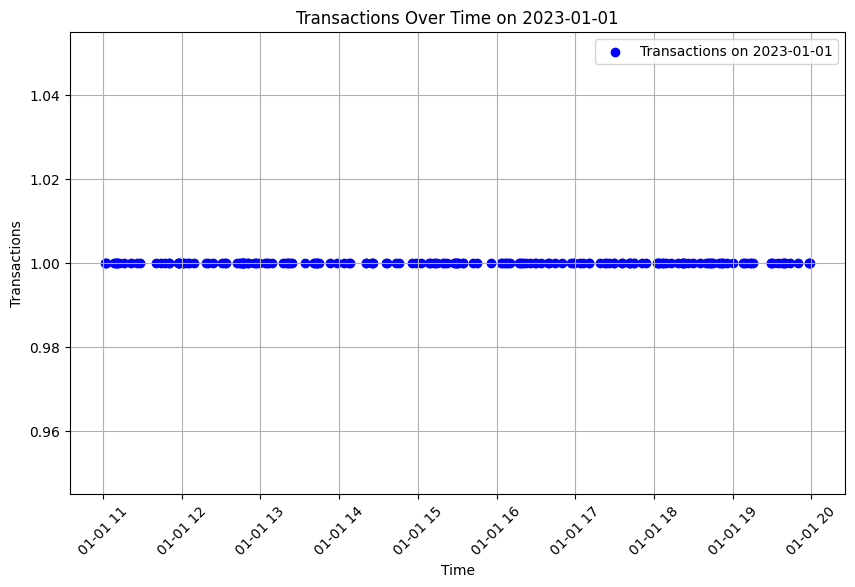

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(plot_data['datetime'], plot_data['_Astoria'], color='blue', label=f'Transactions on {specific_date}')
plt.title(f'Transactions Over Time on {specific_date}')
plt.xlabel('Time')
plt.ylabel('Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#Overview

In [ ]:
#scatter plot
fig, ax = plt.subplots()
ax.scatter(coffee_df["Date"], coffee_df["_Astoria"] * coffee_df["Qty"], c="green", label="Astoria x Qty")

#labelling
ax.set_xlabel("Date")
ax.set_ylabel("Value (Astoria x Qty)")
ax.set_title("Scatter Plot of Astoria x Qty Over Time")
ax.legend()

#show
plt.show()

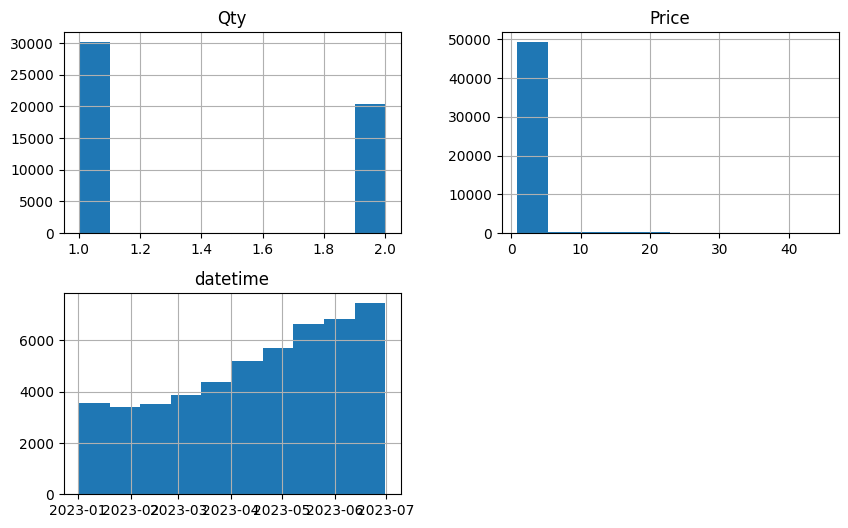

In [ ]:
df_hist = df.drop(columns=['Date'],axis=1)
df_hist.hist(figsize=(10,6));

In [ ]:
duplicate_dates = df[df['Date'].duplicated()]
print(duplicate_dates)

In [ ]:
print(df.dtypes)

Date        datetime64[ns]
Time                object
Qty                  int64
Store               object
Price              float64
Product             object
Period            category
day_type            object
_Astoria              bool
datetime    datetime64[ns]
dtype: object


Now that I've wrangled and shaped the data to my liking, I can begin the EDA process in the next phase of the capstone project. During the EDA process, I will explore the differences in sales based on the time of day and location. Specifically, I will analyze sales trends for different times of the day to identify patterns and variations. Furthermore, I will delve deeper into forecasting future sales and exploring potential improvements through modeling.

#Exploring and Data Analysis

While wrangling the data i was able to evaluate that the sales from close up shows that there's consistent sales everyday. Now we want to truly explore the data of each variable.